# Online Shopping Customer Purchase Pattern Data Analysis

Name : Sayan De

Roll No : FT252082

Data Lab Assignment(Online Purchase Pattern)

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [29]:
#reading dataset into dataframe
df = pd.read_csv('online_shoppers_intention 10JUNE.csv')

# Dataset Overview

In [6]:
#First 5 Columns
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Scroll,user_engagement,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue
0,0.0,0.0,NaN,0.0,1,0.000000,20.0,8.0,0.0,Feb,1,1.0,1,Returning_Visitor,False,False
1,0.0,0.0,NaN,0.0,2,64.000000,0.0,4.0,0.0,Feb,2,2.0,1,Returning_Visitor,False,False
2,0.0,0.0,NaN,0.0,1,0.000000,20.0,8.0,0.0,Feb,4,1.0,9,Returning_Visitor,False,False
3,0.0,0.0,NaN,0.0,2,2.666667,5.0,5.6,0.0,Feb,3,2.0,2,Returning_Visitor,False,False
4,0.0,0.0,NaN,0.0,10,627.500000,2.0,2.0,0.0,Feb,3,3.0,1,Returning_Visitor,True,False


In [7]:
#Columns of the Dataset
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'Scroll', 'user_engagement', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [8]:
#Dimensions-Row, column
df.shape

(12330, 16)

In [9]:
# Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12324 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            376 non-null    float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   Scroll                   12330 non-null  float64
 7   user_engagement          12330 non-null  float64
 8   SpecialDay               12330 non-null  float64
 9   Month                    12330 non-null  object 
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12328 non-null  float64
 12  Region                   12330 non-null  int64  
 13  VisitorType              12330 non-null  object 
 14  Weekend               

In [10]:
#Null Check
df.isnull().sum()

Administrative                 6
Administrative_Duration        0
Informational              11954
Informational_Duration         0
ProductRelated                 0
ProductRelated_Duration        0
Scroll                         0
user_engagement                0
SpecialDay                     0
Month                          0
OperatingSystems               0
Browser                        2
Region                         0
VisitorType                    0
Weekend                        0
Revenue                        0
dtype: int64

# Questions

### 1.Comment on the nature of the dataset.

In [17]:
print('No of rows in the Dataset is', df.shape[0])
print('No of Columns in the Dataset is', df.shape[1])

No of rows in the Dataset is 12330
No of Columns in the Dataset is 16


In [13]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'Scroll', 'user_engagement', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [11]:
#getting numerical Columns
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'Scroll', 'user_engagement', 'SpecialDay', 'OperatingSystems',
       'Browser', 'Region'],
      dtype='object')

In [12]:
#getting non-numerical columns
df.select_dtypes(include=['object']).columns

Index(['Month', 'VisitorType'], dtype='object')

In [14]:
#getting boolen columns
df.select_dtypes(include=['bool']).columns

Index(['Weekend', 'Revenue'], dtype='object')

So, there are 16 Columns in the dataset from which 12 are Numerical , 2 are Object(String) and 2 are boolean type

In [15]:
#Statistical Overview
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Scroll,user_engagement,SpecialDay,OperatingSystems,Browser,Region
count,12324.000000,12330.000000,376.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12328.000000,12330.000000
mean,2.315401,80.818611,0.492021,34.472398,31.731468,1194.746220,2.219138,1.722912,0.061427,2.124006,2.357154,3.147364
std,3.322101,176.779107,1.358407,140.749294,44.475503,1913.669288,4.848832,1.943862,0.198917,0.911325,1.717410,2.401591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.571429,0.000000,2.000000,2.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.311247,1.006256,0.000000,2.000000,2.000000,3.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,1.681256,2.000000,0.000000,3.000000,2.000000,4.000000
max,27.000000,3398.750000,12.000000,2549.375000,705.000000,63973.522230,20.000000,8.000000,1.000000,8.000000,13.000000,9.000000


In [18]:
#Checking Null values
df.isnull().sum()

Administrative                 6
Administrative_Duration        0
Informational              11954
Informational_Duration         0
ProductRelated                 0
ProductRelated_Duration        0
Scroll                         0
user_engagement                0
SpecialDay                     0
Month                          0
OperatingSystems               0
Browser                        2
Region                         0
VisitorType                    0
Weekend                        0
Revenue                        0
dtype: int64

So, There are 3 Columns 'Administrative','Informational' and 'Browser' with Null values

### 2.Explain how you will handle the missing values in the dataset? Give detailed reasoning for your decision about missing value for each variable.

Calculating Percentage of missing values for each Columns

In [28]:
(df.isnull().sum()/len(df))*100

Administrative              0.048662
Administrative_Duration     0.000000
Informational              96.950527
Informational_Duration      0.000000
ProductRelated              0.000000
ProductRelated_Duration     0.000000
Scroll                      0.000000
user_engagement             0.000000
SpecialDay                  0.000000
Month                       0.000000
OperatingSystems            0.000000
Browser                     0.016221
Region                      0.000000
VisitorType                 0.000000
Weekend                     0.000000
Revenue                     0.000000
dtype: float64

As we can see for the column 'Informational' almost 97% of data is Null, so we can drop the column

In [34]:
df['Administrative'].mode(0)

0    0.0
Name: Administrative, dtype: float64

In [36]:
df['Administrative'].value_counts()

Administrative
0.0     5765
1.0     1353
2.0     1114
3.0      914
4.0      765
5.0      575
6.0      432
7.0      337
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
21.0       2
20.0       2
27.0       1
26.0       1
Name: count, dtype: int64

In [40]:
# Values occurance percentage
df['Administrative'].value_counts()/len(df['Administrative'])*100

Administrative
0.0     46.755880
1.0     10.973236
2.0      9.034874
3.0      7.412814
4.0      6.204380
5.0      4.663423
6.0      3.503650
7.0      2.733171
8.0      2.327656
9.0      1.824818
10.0     1.240876
11.0     0.851582
12.0     0.697486
13.0     0.454177
14.0     0.356853
15.0     0.308191
16.0     0.194647
17.0     0.129765
18.0     0.097324
19.0     0.048662
24.0     0.032441
22.0     0.032441
23.0     0.024331
21.0     0.016221
20.0     0.016221
27.0     0.008110
26.0     0.008110
Name: count, dtype: float64

So there are Administrative = 0, with 46.75% of the occureances

For the Administrative column there is 6 Null values as the No is less in comparison to the whole dataset 12330 records, we can replace the Null values with the Most occured value for the column i.e the Mode of that column

In [42]:
df['Browser'].value_counts()

Browser
2.0     7959
1.0     2462
4.0      736
5.0      467
6.0      174
10.0     163
8.0      135
3.0      105
13.0      61
7.0       49
12.0      10
11.0       6
9.0        1
Name: count, dtype: int64

with the previous logic as there is only 2 null values we can replace them with the mode of the Column

In [56]:
df.drop(columns = 'Informational', inplace = True)

In [65]:
df['Administrative'].fillna(df['Administrative'].mode()[0], inplace = True)

In [66]:
df['Browser'].fillna(df['Browser'].mode()[0], inplace = True)

In [67]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
Scroll                     0
user_engagement            0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### 3.ProductRelated_Duration explains how much time a customer has stayed in product related page. How can you explain only about this feature to your manager?

In [77]:
# Statistical measured for the Total time spent on the informational pages
df['ProductRelated_Duration'].describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

Number of outliers:
961


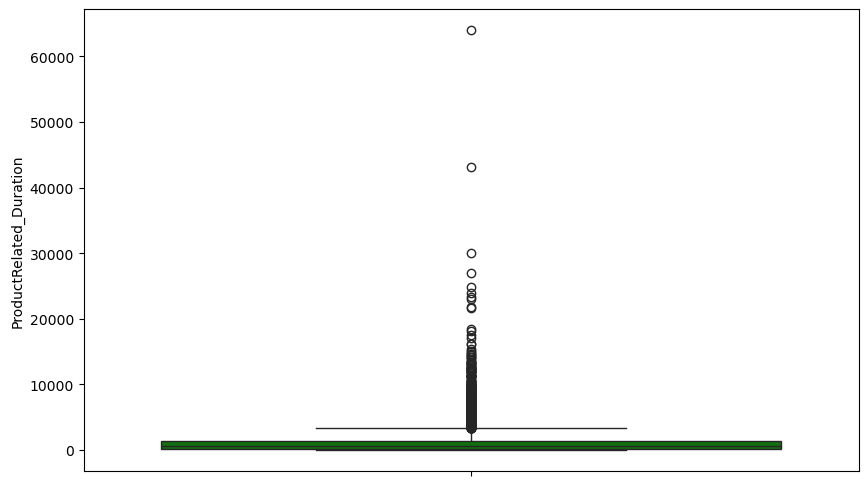

In [30]:
Q1 = df['ProductRelated_Duration'].quantile(0.25)
Q3 = df['ProductRelated_Duration'].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for identifying outliers
threshold = 1.5

# Identifying outliers
outliers = (df['ProductRelated_Duration'] < (Q1 - threshold * IQR)) | (df['ProductRelated_Duration'] > (Q3 + threshold * IQR))

print("Number of outliers:")
print(outliers.sum())

# Visualizing the outliers with the help of a Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(df['ProductRelated_Duration'], color = 'g')
plt.show()

In [85]:
print('The median value of ProductRelated_Duration is :', df['ProductRelated_Duration'].median())

The median value of ProductRelated_Duration is : 598.9369047499999


#### Summary
The data for the column 'ProductRelated_Duration' is highly spreaded with Ranging from 0(min) to 63973.52(max) with a Standard deviation of 1913.66,on an average of user has stayed in Product related for 1194.74 and median value of the column is 598.93 

Also there are 961 Outliers 

### 4.Create a new dataset with product related page information, time of scroll, user engagement, type of visitor and whether they generated revenue

In [86]:
df = pd.read_csv('online_shoppers_intention 10JUNE.csv')

In [90]:
df_new = df[['ProductRelated','Scroll','user_engagement','VisitorType','Revenue']]

In [93]:
#New Dataset with Specified Columns
df_new.head()

,ProductRelated,Scroll,user_engagement,VisitorType,Revenue
0,1,20.0,8.0,Returning_Visitor,False
1,2,0.0,4.0,Returning_Visitor,False
2,1,20.0,8.0,Returning_Visitor,False
3,2,5.0,5.6,Returning_Visitor,False
4,10,2.0,2.0,Returning_Visitor,False


### 5.Analyse the scroll time for New_Visitor and give your detailed comment.

In [110]:
#Filtering dataset to obtain Scrfoll
df_nv_scroll = df[df['VisitorType']=='New_Visitor']['Scroll'].reset_index()
df_nv_scroll.describe()

,index,Scroll
count,1694.000000,1694.000000
mean,6744.596812,0.526116
std,3388.972988,2.631151
min,93.000000,0.000000
25%,4099.750000,0.000000
50%,7076.000000,0.000000
75%,9643.500000,0.000000
max,12329.000000,20.000000


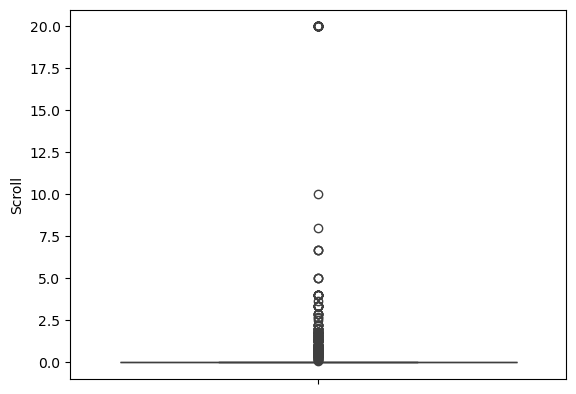

In [111]:
sns.boxplot(y = 'Scroll', data = df_nv_scroll)
plt.show()

In [132]:
Q1 = df_nv_scroll['Scroll'].quantile(0.25)
Q3 = df_nv_scroll['Scroll'].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for identifying outliers
threshold = 1.5

# Identifying outliers
outliers = (df_nv_scroll['Scroll'] < (Q1 - threshold * IQR)) | (df_nv_scroll['Scroll'] > (Q3 + threshold * IQR))

print("Number of outliers:")
print(outliers.sum())

Number of outliers:
231


### Summary:
For New visitors the Average Scroll time is 0.526116, with a min of 0 and max of 20
The median is 0, hence the Data is highly skewed and from the Boxplot we can observe there are several outliers(231)

### 6.Compare the scroll time and user engagement time for Returning_Visitor, find whether there is any relationship between them. Include your detailed explanation in your report

In [10]:
#Filtering Returning Vistors data
df_ret = df[df['VisitorType']=='Returning_Visitor']

Now if we do a comaprison between Differenent types of Visitors i.e

In [11]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [17]:
# Establisihing Correlation
df_ret['Scroll'].corr(df_ret['user_engagement'])

0.9143989072791908

So, both the features are Highly Corelated

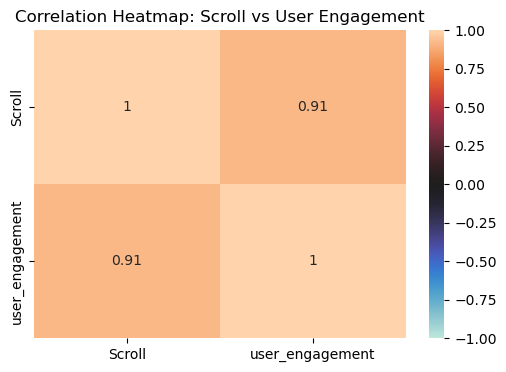

In [28]:
#Plotting heatmap
correlation_matrix = df_ret[['Scroll', 'user_engagement']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Scroll vs User Engagement')
plt.show()

### Conclusion:
Strong Positive Relationship: The correlation value is very close to 1, which means that as the scroll time increases, user engagement time tends to increase as well. Similarly, as scroll time decreases, user engagement time also tends to decrease.

Linear Relationship: The relationship between scroll time and user engagement time is likely to be linear, meaning that changes in one variable are associated with proportional changes in the other variable.

Overall, the correlation of 0.9143989072791908 is a strong indicator that scroll time and user engagement time are closely related, suggesting that efforts to increase scroll time could potentially lead to higher user engagement.


### Visualization via scatter plot

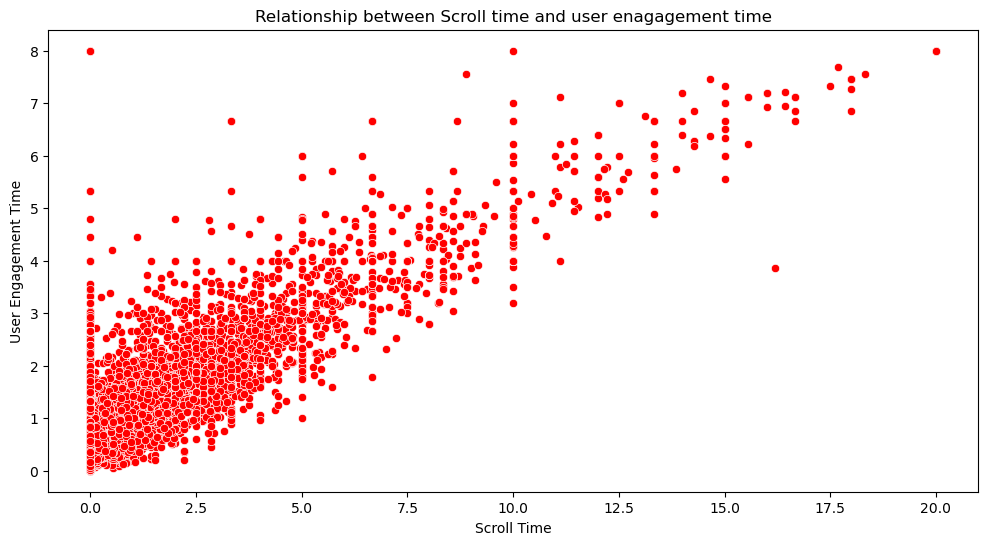

In [136]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Scroll', y = 'user_engagement' , data = df_ret, color = 'red' )
plt.xlabel('Scroll Time')
plt.ylabel('User Engagement Time')
plt.title('Relationship between Scroll time and user enagagement time')
plt.show()

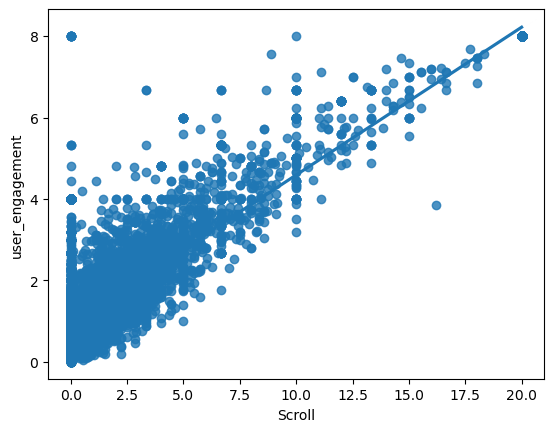

In [138]:
#Drawing Trendline
sns.regplot(x = 'Scroll', y = 'user_engagement' , data = df_ret)
plt.show()

### From the Scatter plot we can observe with increase in user_engagement_time there is gradual increase in Scroll time as well

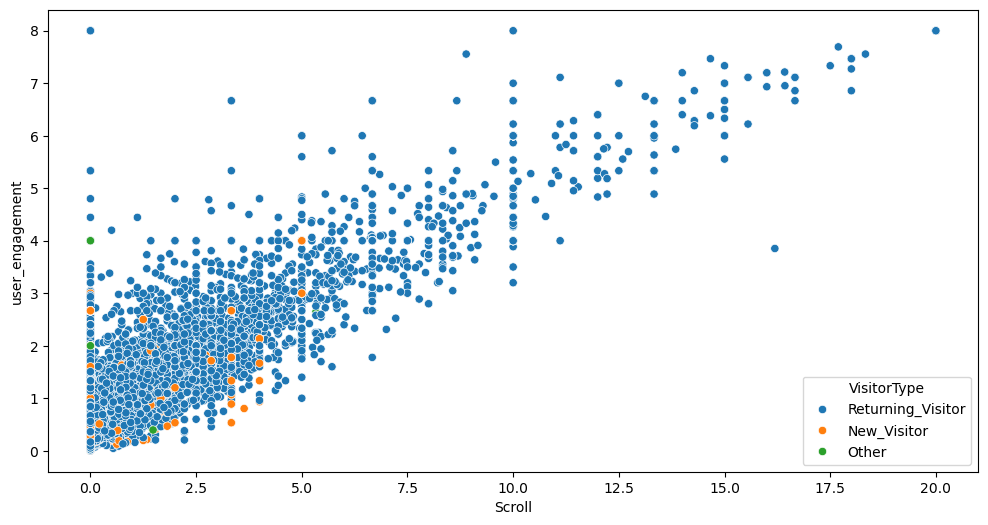

In [7]:
#if we compare scroll time vs engagement time for different types of visitors
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Scroll', y = 'user_engagement' , data = df, hue = 'VisitorType' )
plt.show()


### 7.Extreme values will be useful in some cases to know about the feature. Look for such extreme values in the dataset and provide your decision about handling these values.

#### Detecting Outliers:

The detect_outliers_iqr function calculates the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for each numerical column.
It then identifies values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] as outliers.
Capping/Flooring:

The cap_floor function clips the values in the specified series to the range defined by the 1st and 99th percentiles. This method reduces the impact of extreme values while preserving the data's overall distribution.
For each column in columns_to_cap_floor, the function applies the capping/flooring method.

In [113]:
# function to detect extreme values using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detecting outliers
outliers = detect_outliers_iqr(df)

# Print the number of outliers for each column
for column, outlier_series in outliers.items():
    print(f"{column} has {len(outlier_series)} outliers.")

# function to cap/floor extreme values
def cap_floor(series, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

# capping/flooring to handle extreme values
columns_to_cap_floor = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'Scroll', 'user_engagement'
]

df_capped = df.copy()
for col in columns_to_cap_floor:
    df_capped[col] = cap_floor(df_capped[col])

# Verify changes by checking summary statistics again
print(df_capped.describe())

# Saving the cleaned dataset
df_capped.to_csv('online_shopping_cleaned_dataset.csv', index=False)


Administrative has 404 outliers.
Administrative_Duration has 1172 outliers.
Informational has 80 outliers.
Informational_Duration has 2405 outliers.
ProductRelated has 987 outliers.
ProductRelated_Duration has 961 outliers.
Scroll has 1551 outliers.
user_engagement has 1099 outliers.
SpecialDay has 1251 outliers.
OperatingSystems has 111 outliers.
Browser has 4369 outliers.
Region has 511 outliers.
       Administrative  Administrative_Duration  Informational  \
count    12324.000000             12330.000000     376.000000   
mean         2.286027                76.160053       0.468085   
std          3.191636               141.779884       1.200963   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         14.000000               830.587041       7.250000   

       Infor

### 8.Is there any significant difference in customer spending more time in product related page during weekend and during weekdays?

### If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant

the t-value is a way to quantify the difference between the population means and the p-value is the probability of obtaining a t-value with an absolute value at least as large as the one we actually observed in the sample data if the null hypothesis is actually true.

If the p-value is less than a certain value (e.g. 0.05) then we reject the null hypothesis of the test.

In [17]:
from scipy.stats import ttest_ind

# Separate data into weekends and weekdays
weekend_data = df[df['Weekend'] == True]
weekday_data = df[df['Weekend'] == False]

# Perform t-test on ProductRelated_Duration
t_stat, p_val = ttest_ind(weekend_data['ProductRelated_Duration'], weekday_data['ProductRelated_Duration'], equal_var=False)

print(f'T-statistic: {t_stat}, P-value: {p_val}')

alpha = 0.05  # Significance level
if p_val < alpha:
    print("There is a significant difference in product-related page time between weekends and weekdays.")
else:
    print("There is no significant difference in product-related page time between weekends and weekdays.")


T-statistic: 0.8153763771836811, P-value: 0.41489761689508264
There is no significant difference in product-related page time between weekends and weekdays.


### 9.Comment on the scroll time and user engagement time for festive (Oct, Nov and Dec) and non-festive season.


In [21]:
import pandas as pd
from scipy.stats import ttest_ind


# Define festive and non-festive months
festive_months = ['Oct', 'Nov', 'Dec']
non_festive_months = [month for month in df['Month'].unique() if month not in festive_months]

# Separate data into festive and non-festive periods
festive_data = df[df['Month'].isin(festive_months)]
non_festive_data = df[df['Month'].isin(non_festive_months)]

# Perform t-tests on Scroll and user_engagement
scroll_t_stat, scroll_p_val = ttest_ind(festive_data['Scroll'], non_festive_data['Scroll'], equal_var=False)
engagement_t_stat, engagement_p_val = ttest_ind(festive_data['user_engagement'], non_festive_data['user_engagement'], equal_var=False)

# Print results for Scroll
print(f'Scroll - T-statistic: {scroll_t_stat}, P-value: {scroll_p_val}')
if scroll_p_val < 0.05:
    print("There is a significant difference in scroll time between festive and non-festive months.")
else:
    print("There is no significant difference in scroll time between festive and non-festive months.")

# Print results for user_engagement
print(f'user_engagement - T-statistic: {engagement_t_stat}, P-value: {engagement_p_val}')
if engagement_p_val < 0.05:
    print("There is a significant difference in user engagement time between festive and non-festive months.")
else:
    print("There is no significant difference in user engagement time between festive and non-festive months.")


Scroll - T-statistic: -6.901556608554337, P-value: 5.40167130472651e-12
There is a significant difference in scroll time between festive and non-festive months.
user_engagement - T-statistic: -9.723835614272563, P-value: 2.8821442999159964e-22
There is a significant difference in user engagement time between festive and non-festive months.


### 10.Find the total number of customers who visited the website close (0.8) to any special day. 

In [26]:
special_day_visits = df[df['SpecialDay'] == 0.8]

num_special_day_visits = special_day_visits.shape[0]

print('Total number of customers who visited the website close to a special day is :', num_special_day_visits)

Total number of customers who visited the website close to a special day is : 325


### 11.Find how many returning visitors have created revenue and how many new visitors created revenue. Comment on your observations.


In [28]:
# Filter data for returning and new visitors who created revenue
returning_visitors_with_revenue = df[(df['VisitorType'] == 'Returning_Visitor') & (df['Revenue'] == True)]
new_visitors_with_revenue = df[(df['VisitorType'] == 'New_Visitor') & (df['Revenue'] == True)]

# Count the number of such visitors
num_returning_visitors_with_revenue = returning_visitors_with_revenue.shape[0]
num_new_visitors_with_revenue = new_visitors_with_revenue.shape[0]

print(f'Number of returning visitors who created revenue: ', num_returning_visitors_with_revenue)
print(f'Number of new visitors who created revenue: ', num_new_visitors_with_revenue)


Number of returning visitors who created revenue:  1470
Number of new visitors who created revenue:  422


### 12.Normalize the features in the dataset and give detailed comment on the normalized data.

In [33]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize (excluding non-numeric columns)
columns_to_normalize = [
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'Scroll',
 'user_engagement',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verify the normalization
print(df_normalized.describe())

# Save the normalized dataset
df_normalized.to_csv('Online_Shopping_Normalized_Dataset.csv', index=False)


       Administrative  Administrative_Duration  Informational  \
count    1.232400e+04             1.233000e+04   3.760000e+02   
mean    -3.574623e-17             6.281359e-17   4.724353e-18   
std      1.000041e+00             1.000041e+00   1.001332e+00   
min     -6.969970e-01            -4.571914e-01  -3.626872e-01   
25%     -6.969970e-01            -4.571914e-01  -3.626872e-01   
50%     -3.959705e-01            -4.147639e-01  -3.626872e-01   
75%      5.071090e-01             7.035981e-02  -3.626872e-01   
max      7.430719e+00             1.876956e+01   8.482960e+00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.233000e+04    1.233000e+04             1.233000e+04   
mean            -2.535595e-17    4.610172e-17            -8.298309e-17   
std              1.000041e+00    1.000041e+00             1.000041e+00   
min             -2.449305e-01   -7.134884e-01            -6.243475e-01   
25%             -2.449305e-01   -5.560920e-0

In [35]:
df_normalized.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Scroll,user_engagement,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue
0,-0.696997,-0.457191,NaN,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.308821,Feb,-1.233426,-0.790265,-0.894178,Returning_Visitor,False,False
1,-0.696997,-0.457191,NaN,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.308821,Feb,-0.136078,-0.207970,-0.894178,Returning_Visitor,False,False
2,-0.696997,-0.457191,NaN,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.308821,Feb,2.058618,-0.790265,2.437081,Returning_Visitor,False,False
3,-0.696997,-0.457191,NaN,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.308821,Feb,0.961270,-0.207970,-0.477771,Returning_Visitor,False,False
4,-0.696997,-0.457191,NaN,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.308821,Feb,0.961270,0.374326,-0.894178,Returning_Visitor,True,False


### Detailed Comment on Normalized Data:

**Mean and Standard Deviation**:

All normalized columns now have a mean of approximately 0 and a standard deviation of 1. This ensures that the data is both centered and scaled.

**Distribution**:

The relative distribution of each feature remains unchanged, but they are scaled to a common range. This helps maintain the relationships between data points while making the data suitable for various algorithms.

**Impact on Algorithms**:

Standardization is particularly beneficial for algorithms that assume the data is normally distributed or that are sensitive to data scale, such as linear regression, logistic regression, and principal component analysis (PCA).

**Handling Categorical Data**:

Categorical columns like 'Month', 'VisitorType', 'Weekend', and 'Revenue' are not normalized because they are not numeric. These can be handled separately if needed, such as with one-hot encoding for categorical variables.

**Consistency**:

Ensuring that all numeric features are on the same scale improves the consistency and interpretability of the model outputs.

By standardizing the dataset, each feature is made to contribute equally, leading to more reliable and interpretable results in downstream analysis or machine learning models.